In [22]:
import pandas as pd 

df = pd.read_csv('data/data_to_simulate.csv', index_col=0)
df.dropna(inplace=True)
print(df.columns)
columns = ['GTIME_KI', 'GSTATUS_KI', 'AGE_DON', 'HCV_SEROSTATUS', 'GENDER_DON', 'AGE', 'DIAB',
                'BMI_CALC', 'ETHCAT', 'GENDER', 'COLD_ISCH_KI', 'SERUM_CREAT',
                'CREAT_TRR', 'delta_age', 'HIST_DIABETES_DON', 'HGT_CM_DON_CALC','CREAT_TRRg1.5', 'SERUM_CREATg1.2',
                'COD_CAD_DON', 'WGT_KG_DON_CALC', 'CREAT_DON', 'ETHCAT_DON',
                'HIST_HYPERTENS_DON', 'NON_HRT_DON', 'DIALYSIS_DATE','TX_DATE', 'PT_CODE', 'ABO', 'ABO_DON']

predictors = ['AGE_DON', 'CREAT_TRR', 'HGT_CM_DON_CALC', 'HCV_SEROSTATUS', 'WGT_KG_DON_CALC',
                    'HIST_DIABETES_DON', 'HIST_HYPERTENS_DON', 'COD_CAD_DON', 'ETHCAT_DON', 'ABO_MAT', 
                    'HLAMIS', 'DIALYSIS_DATE', 'AGE', 'DIAB', 'DIALYSIS_DATEle0.0', 'CREAT_TRRg1.5', 'SERUM_CREATg1.2']

donor = df[['AGE_DON', 'CREAT_TRR', 'CREAT_TRRg1.5', 'HGT_CM_DON_CALC', 'HCV_SEROSTATUS', 'HIST_DIABETES_DON', 
            'HIST_HYPERTENS_DON', 'ABO_DON', 'AGE_DONge50', 'WGT_KG_DON_CALCl80', 'COD_CAD_DON_2', 'ETHCAT_DON_2']]

print(donor.columns)
donor.to_csv('data/donors.csv')

recipient = df[[ 'DIALYSIS_DATE', 'AGE', 'DIAB', 'ETHCAT', 'GENDER', 'ABO', 'DIALYSIS_DATEle0.0']]
recipient.to_csv('data/recipients.csv')

Index(['GTIME_KI', 'GSTATUS_KI', 'AGE_DON', 'HCV_SEROSTATUS', 'GENDER_DON',
       'AGE', 'DIAB', 'BMI_CALC', 'ETHCAT', 'GENDER', 'COLD_ISCH_KI',
       'SERUM_CREAT', 'ABO_MAT', 'AMIS', 'BMIS', 'DRMIS', 'CREAT_TRR',
       'delta_age', 'HIST_DIABETES_DON', 'HGT_CM_DON_CALC', 'ABO_DON',
       'COD_CAD_DON', 'WGT_KG_DON_CALC', 'CREAT_DON', 'ETHCAT_DON',
       'HIST_HYPERTENS_DON', 'NON_HRT_DON', 'DIALYSIS_DATE', 'TX_DATE',
       'PT_CODE', 'COMPOSITE_DEATH_DATE', 'ABO', 'T', 'Tag_date', 'DIAB_1',
       'DIAB_998', 'HIST_DIABETES_DON_1', 'HIST_DIABETES_DON_998',
       'AGE_DONge50', 'CREAT_TRRg1.5', 'WGT_KG_DON_CALCl80', 'COD_CAD_DON_2',
       'ETHCAT_DON_2', 'DIALYSIS_DATEle0.0'],
      dtype='object')
Index(['AGE_DON', 'CREAT_TRR', 'CREAT_TRRg1.5', 'HGT_CM_DON_CALC',
       'HCV_SEROSTATUS', 'HIST_DIABETES_DON', 'HIST_HYPERTENS_DON', 'ABO_DON',
       'AGE_DONge50', 'WGT_KG_DON_CALCl80', 'COD_CAD_DON_2', 'ETHCAT_DON_2'],
      dtype='object')


In [23]:
recipient.ABO.unique()

array(['B', 'A', 'O', 'AB', 'A2', 'A1', 'A1B', 'A2B'], dtype=object)

In [24]:
blood_type_compatibility = {
    "A": ["A", "A1", "A2", "AB", "A1B", "A2B"],
    "A1": ["A", "A1", "A2", "AB", "A1B", "A2B"],
    "A2": ["A", "A1", "A2", "AB", "A1B", "A2B", "B"],
    "B":  ["B", "AB", "A1B", "A2B"],
    "AB": ["AB", "A1B", "A2B"],
    "A1B": ["A1B"],
    "A2B": ["A2B", "AB"],
    "O": ["A", "A1", "A2", "B", "AB", "A1B", "A2B", "O"]
}

In [25]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
path = Path("C:/Users/HP/Desktop/UNOS data/codes/simulation-waitline-unos").resolve()  # Get the absolute path
os.chdir(path)
import pandas as pd
import numpy as np
import scipy as sc
import recipient as rec
import prediction as pred 
import donor as don
from event import Event



In [26]:
def create_list_of_events(n_events = 10000):
    events = Event(number_of_events= n_events, 
                    time_between_arrivals_recipients=4, 
                    time_between_arrivals_donor= 6) #average time in days
    events.create_events()
    return events

In [27]:
TARGET_TIME  = 5 * 365
SIMULATION_TIME = 365*40 
predictor = pred.SurvivalPredictionModel(model_path='models\decision_tree_2511.pkl')
#9.1% leave the list
#theshold_leave_list = 0.091 
recipients_for_initialization = 300
time_before_starting_simulation = 0
released_recipients = []

models\decision_tree_2511.pkl
ok
Model loaded successfully from models\decision_tree_2511.pkl.


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_13688\2240587350.py:3: SyntaxWarning: invalid escape sequence '\d'
  predictor = pred.SurvivalPredictionModel(model_path='models\decision_tree_2511.pkl')


In [28]:
predictor.model.feature_names_in_

array(['AGE_DON', 'CREAT_TRR', 'HGT_CM_DON_CALC', 'HCV_SEROSTATUS',
       'HIST_DIABETES_DON', 'HIST_HYPERTENS_DON', 'DIALYSIS_DATE', 'AGE',
       'DIAB', 'AGE_DONge50', 'CREAT_TRRg1.5', 'WGT_KG_DON_CALCl80',
       'COD_CAD_DON_2', 'ETHCAT_DON_2', 'DIALYSIS_DATEle0.0'],
      dtype=object)

In [29]:
df = pd.DataFrame(columns=['replicate', 'ethcat', 'gender', 'waiting_time', 'mean_survival_time', 'current_time'])
df_leaves = pd.DataFrame(columns=['replicate', 'ethcat', 'gender', 'waiting_time', 'mean_survival_time', 'current_time'])
waiting_time_convergence = []
wait_list_length = []
leave_list_global = []



def run_simulation(T=10, replicates=1, verbose=False):
    waiting_time_convergence_r = []
    wait_list_length_r = []
    average_waiting_times = []
    number_of_matches_list = []
    
    for r in range(replicates):
        events = create_list_of_events(n_events = 5000)
        print('Replicate #', str(r))
        wait_list = []  # Initialize an empty waitlist for each replicate
        leave_list = []
        next_in_leave_the_list = []
        total_waiting_time = 0  # Track the total waiting time for this replicate
        num_matched_patients = 0  # Track the number of matched patients
        current_t = 0  # Start time    
    
        for i in range(recipients_for_initialization):
                new_recipient = rec.Recipient(time_before_starting_simulation) 
                new_recipient.create_recipient()
                wait_list.append(new_recipient)
                next_in_leave_the_list.append((new_recipient.time_to_leave_list, new_recipient.reason_to_leave_list, new_recipient.ID))
                next_in_leave_the_list = sorted(next_in_leave_the_list)
                
        while current_t < T:  
            (time_aux, _)  = events.list_of_events[0]
            (time2_aux, _, _) = next_in_leave_the_list[0]
            
            if time_aux + current_t < time2_aux:
                (time, event_type)  = events.list_of_events.pop(0)
                ID = None
                print(time+current_t, event_type, ID)
            else: 
                (time, event_type, ID) = next_in_leave_the_list.pop(0)
                print(time, event_type, ID)
                   
            #print(time, event_type)         
            match event_type:
                case "new_donor":
                    current_t += time
                    donor = don.Donor(current_t)
                    donor.create_donor()
                    
                    if len(wait_list) < 1:
                        raise('The waitlist length is 0, check the setup please')            
                    
                    survival_probs = [predictor.predict_survival_prob(recipient, donor, TARGET_TIME) 
                                    for recipient in wait_list 
                                    if donor.blood in blood_type_compatibility[recipient.blood]]
                                    
                    if len(survival_probs)>0: 
                        best_match_index = np.argmax(survival_probs)
                        recipient_best = wait_list[best_match_index]
                        _, predicted_survival_function = predictor.predict_survival_prob(recipient_best, donor, TARGET_TIME, surv_function=True)
                        
                        mean_survival_time = sum(
                        (predicted_survival_function[0].x[i + 1] - predicted_survival_function[0].x[i]) *
                        predicted_survival_function[0].y[i]
                        for i in range(len(predicted_survival_function[0].x) - 1)
)
                        
                        best_patient = wait_list.pop(best_match_index)
                        next_leave_time = [(a, b, c) for (a, b, c) in next_in_leave_the_list if c==best_patient.ID]
                        _index = next_in_leave_the_list.index(next_leave_time[0])   
                        _ = next_in_leave_the_list.pop(_index)
                        
                        print(f'A donation was done with expected life {mean_survival_time} and probabity {survival_probs[best_match_index]}. Day: ', str(current_t))
                        waiting_time = current_t - best_patient.arrival_time
                        
                        if current_t > 8*365.25:
                            total_waiting_time += waiting_time
                            
                        best_patient.waiting_time = waiting_time
                        
                        
                        if current_t > 8*365.25:
                            df.loc[len(df)] = [r, best_patient.ethcat, best_patient.gender, best_patient.waiting_time, mean_survival_time, current_t]
                            released_recipients.append(best_patient)
                            num_matched_patients += 1
                
                case "new_recipient":            
                    current_t += time
                    new_recipient = rec.Recipient(current_t) 
                    new_recipient.create_recipient()
                    wait_list.append(new_recipient)
                    next_in_leave_the_list.append((new_recipient.time_to_leave_list, new_recipient.reason_to_leave_list, new_recipient.ID))
                    next_in_leave_the_list = sorted(next_in_leave_the_list)
                    print('A new recipient has arrived. Day: ', str(current_t))
                
                case "leave_list":
                    current_t = time
                    next_leave_time = [p for p in wait_list if p.ID==ID]
                    _index = wait_list.index(next_leave_time[0])   
                    out_of_list = wait_list.pop(_index)
                    leave_list.append(out_of_list)
                    
                    if current_t > 8*365.25:
                        df_leaves.loc[len(df)] = [r, out_of_list.ethcat, out_of_list.gender, out_of_list.waiting_time, _, current_t]
                        print('----------------------- One patient left the waitlist. Day: ', str(current_t), out_of_list.ID) 
                    
                    

            if num_matched_patients>0:
                if current_t > 8*365.25:
                    average_time = total_waiting_time / num_matched_patients
                    #we collect data after 8 years
                    waiting_time_convergence_r.append([current_t, average_time])
                wait_list_length_r.append([current_t, len(wait_list)])
            else: 
                average_time = 'INF'
            if verbose:
                print(f'Number of matches: {num_matched_patients}, recipients in wait list: {len(wait_list)},'
                      f'average time in waitlist {average_time}, patients which leave the list {len(leave_list)}')        
        if num_matched_patients > 0:
            average_waiting_times.append(total_waiting_time / num_matched_patients)
            waiting_time_convergence.append(waiting_time_convergence_r)
            wait_list_length.append(wait_list_length_r)
            number_of_matches_list.append(num_matched_patients)
            leave_list_global.append(leave_list)
        else:
            average_waiting_times.append(0)
            
    return average_waiting_times, number_of_matches_list


In [30]:
run_simulation(T=SIMULATION_TIME, replicates=1, verbose=True)

Replicate # 0
1.0825117327977392 new_donor None
A donation was done with expected life 2354.0468992355763 and probabity 0.6213407169292465. Day:  1.0825117327977392
Number of matches: 0, recipients in wait list: 299,average time in waitlist INF, patients which leave the list 0
3.4598806606281243 new_recipient None
A new recipient has arrived. Day:  3.4598806606281243
Number of matches: 0, recipients in wait list: 300,average time in waitlist INF, patients which leave the list 0
3.7921859119208885 new_donor None
A donation was done with expected life 3010.319193262576 and probabity 0.7911197600210826. Day:  3.7921859119208885
Number of matches: 0, recipients in wait list: 299,average time in waitlist INF, patients which leave the list 0
3.989065150772345 new_recipient None
A new recipient has arrived. Day:  3.989065150772345
Number of matches: 0, recipients in wait list: 300,average time in waitlist INF, patients which leave the list 0
5.407444247055283 new_recipient None
A new recipien

([1490.6711671963687], [1573])

In [31]:
waiting_time_leaves=[]
for pa in leave_list_global[0]:
     waiting_time_leaves.append([pa.waiting_time])
    

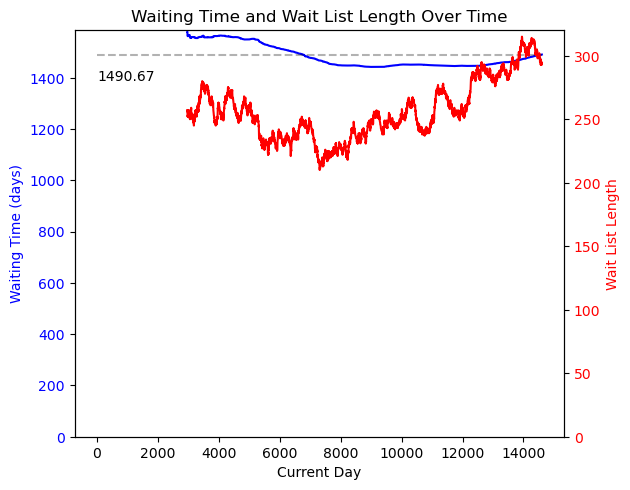

In [32]:
# Create the DataFrame for the first plot
df_plot = pd.DataFrame(waiting_time_convergence[0], columns=['current_t', 'waiting_time'])
df_plot2 = pd.DataFrame(wait_list_length[0], columns=['current_t', 'waitlist_length'])

# Create the plot with two y-axes
fig, ax1 = plt.subplots()

# First y-axis
ax1.plot(df_plot['current_t'], df_plot['waiting_time'], label="Waiting Time", color='blue')
ax1.set_xlabel('Current Day')
ax1.set_ylabel('Waiting Time (days)', color='blue')
# Adding a horizontal line at the last waiting time
last_waiting_time = df_plot['waiting_time'].iloc[-1]
ax1.hlines(last_waiting_time, 0, df_plot['current_t'].max(), colors='black', alpha=0.3, linestyles='dashed')
ax1.annotate(str(np.round(last_waiting_time,2)), (0, last_waiting_time-100))
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0)

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df_plot2['current_t'], df_plot2['waitlist_length'], label="Wait List Length (number of patients)", color='red')
ax2.set_ylabel('Wait List Length', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0)

# Add titles and show the plot
fig.tight_layout()  # Adjust layout to avoid overlap
plt.title('Waiting Time and Wait List Length Over Time')
plt.show()

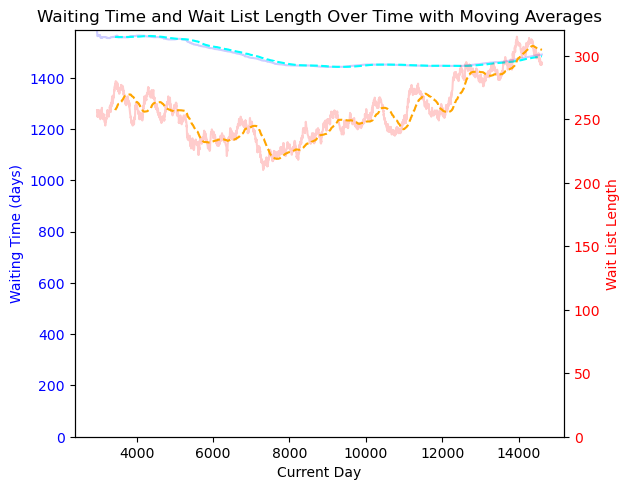

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the DataFrame for the first plot
df_plot = pd.DataFrame(waiting_time_convergence[0], columns=['current_t', 'waiting_time'])
df_plot2 = pd.DataFrame(wait_list_length[0], columns=['current_t', 'waitlist_length'])

# Calculate moving averages
window_size = 200  # Set the rolling window size
df_plot['moving_avg_waiting_time'] = df_plot['waiting_time'].rolling(window=window_size).mean()
df_plot2['moving_avg_waitlist_length'] = df_plot2['waitlist_length'].rolling(window=window_size).mean()

# Create the plot with two y-axes
fig, ax1 = plt.subplots()

# First y-axis (Waiting Time)
ax1.plot(df_plot['current_t'], df_plot['waiting_time'], label="Waiting Time", color='blue', alpha=0.2)
ax1.plot(df_plot['current_t'], df_plot['moving_avg_waiting_time'], label="Moving Avg (Waiting Time)", color='cyan', linestyle='--')
ax1.set_xlabel('Current Day')
ax1.set_ylabel('Waiting Time (days)', color='blue')
ax1.set_ylim(0)
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis (Wait List Length)
ax2 = ax1.twinx()
ax2.plot(df_plot2['current_t'], df_plot2['waitlist_length'], label="Wait List Length", color='red', alpha=0.2)
ax2.plot(df_plot2['current_t'], df_plot2['moving_avg_waitlist_length'], label="Moving Avg (Wait List Length)", color='orange', linestyle='--')
ax2.set_ylabel('Wait List Length', color='red')
ax2.set_ylim(0)
ax2.tick_params(axis='y', labelcolor='red')



# Add title and show the plot
fig.tight_layout()  # Adjust layout to avoid overlap
plt.title('Waiting Time and Wait List Length Over Time with Moving Averages')
plt.show()
